# 🌍 世界幸福度レポートの分析

**氏名：**MONTELLA EDWIN  
**学籍番号：**1254810992  


## 1. 序論

本レポートでは、World Happiness Report のデータを用いて、各国の幸福度と経済的・社会的要因との関係を分析する。  
近年、幸福度は GDP だけでは測れない社会の豊かさを示す指標として注目されている。  
本研究では、幸福度スコアの国際比較や地域差、GDP との関係を明らかにすることを目的として、このテーマを選択した。

## 2.データ読み込み

In [1]:
# 必要なライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('world_happiness_report.csv')

# データの最初の5行を表示
df.head()


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [2]:
# データの形状を確認（行数・列数）
print(f"データの形状: {df.shape}")

# データの基本情報
df.info()


データの形状: (1231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

In [3]:
# 基本統計量を表示
df.describe()


,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


## 3.分析
# 分析1：幸福度スコアが高い国・低い国

In [4]:
# 幸福度スコア上位5か国
df[['Country', 'Happiness Score']].sort_values(
    by='Happiness Score', ascending=False
).head()


,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
158,Denmark,7.526
3,Norway,7.522


In [5]:
# 幸福度スコア下位5か国
df[['Country', 'Happiness Score']].sort_values(
    by='Happiness Score'
).head()


,Country,Happiness Score
157,Togo,2.839
314,Burundi,2.905
156,Burundi,2.905
155,Syria,3.006
313,Syria,3.069


# 分析2：GDPと幸福度の関係

In [7]:
# GDPと幸福度スコアの相関係数
df['Economy (GDP per Capita)'].corr(df['Happiness Score'])


np.float64(0.7791710951128711)

# 分析3：地域別の平均幸福度

In [8]:
# 地域別平均幸福度スコア
region_avg = df.groupby('Region')['Happiness Score'].mean()
region_avg


Region
Australia and New Zealand          7.304250
Central and Eastern Europe         5.351810
Eastern Asia                       5.625167
Latin America and Caribbean        6.122283
Middle East and Northern Africa    5.396744
North America                      7.263500
Southeastern Asia                  5.328167
Southern Asia                      4.572071
Sub-Saharan Africa                 4.170462
Western Europe                     6.687643
Name: Happiness Score, dtype: float64

# 4. 可視化
## グラフ1：幸福度スコアの分布

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = [
    'IPAexGothic',      # IPA
    'Hiragino Sans',    # Mac
    'Yu Gothic',        # Windows
    'MS Gothic'
]


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not 

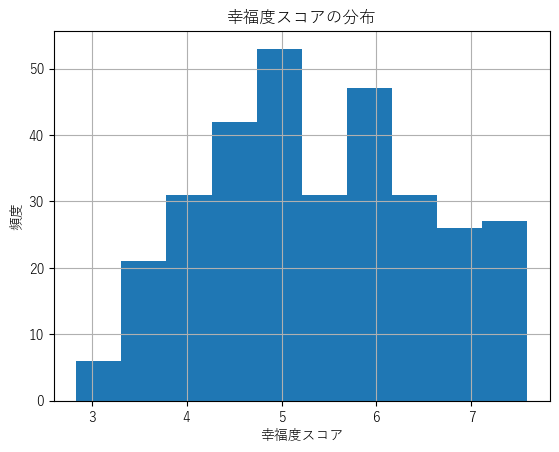

In [16]:
plt.figure()
df['Happiness Score'].hist()
plt.title('幸福度スコアの分布')
plt.xlabel('幸福度スコア')
plt.ylabel('頻度')
plt.show()


# グラフ2：GDPと幸福度の関係

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not 

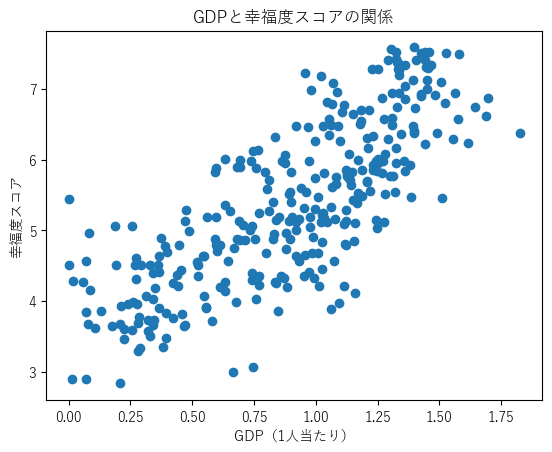

In [17]:
plt.figure()
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'])
plt.title('GDPと幸福度スコアの関係')
plt.xlabel('GDP（1人当たり）')
plt.ylabel('幸福度スコア')
plt.show()


# グラフ3：地域別平均幸福度

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'IPAexGothic' not 

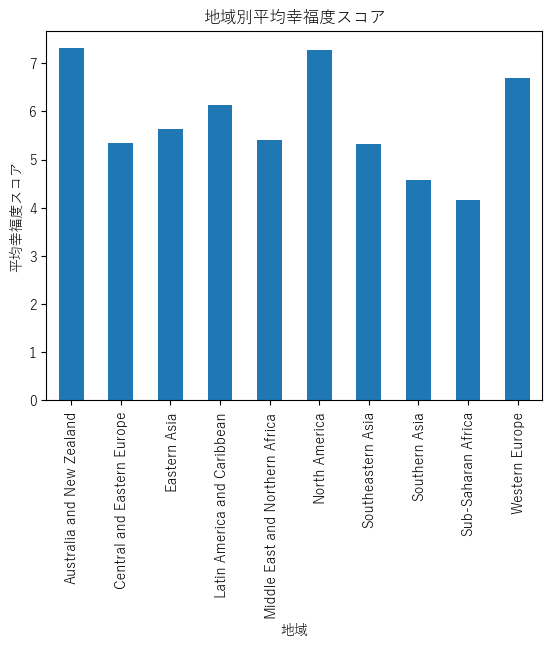

In [18]:
plt.figure()
region_avg.plot(kind='bar')
plt.title('地域別平均幸福度スコア')
plt.xlabel('地域')
plt.ylabel('平均幸福度スコア')
plt.show()


## 5. 結論
本分析の結果、幸福度スコアは GDP と正の相関関係にあることが確認でき、経済的豊かさが幸福度に一定の影響を与えていることが示された。
一方で、地域別に見ると幸福度には大きな差があり、経済要因だけでなく、社会的支援や生活環境、健康などの要素も重要であると考えられる。
以上より、国民の幸福度を高めるためには、経済成長に加えて、社会制度や生活の質を向上させる取り組みが不可欠である。